**A. Importando pytorch y git**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
filename=glob.glob('/content/drive/MyDrive/chexpert/dataset/train/edema/*')
print(filename)

52246


In [ ]:
print(len(filename))

52246


In [ ]:
filename=glob.glob('/content/drive/MyDrive/chexpert/dataset/train/sin_edema/*')
print(len(filename))

171168


In [ ]:
#!unrar x "/content/drive/MyDrive/retino/train_clasificado.rar" "/content/drive/MyDrive/retino/"

In [ ]:
#!unrar x "/content/drive/MyDrive/retino/test.rar" "/content/drive/MyDrive/retino/"

In [ ]:
 #!rm -d '/content/drive/MyDrive/retino/data/train/.ipynb_checkpoints'
 #!ls -a '/content/drive/MyDrive/chexpert/dataset/'
 !ls -a '/content/drive/MyDrive/chexpert/dataset/train/sin_edema'


^C


In [ ]:
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 705 kB 8.1 MB/s 
     |████████████████████████████████| 419 kB 58.9 MB/s 
     |████████████████████████████████| 5.9 MB 58.8 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.0 which is incompatible.


In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/rwightman/pytorch-image-models.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rwightman/pytorch-image-models.git to /tmp/pip-req-build-qy6ftap_
  Running command git clone -q https://github.com/rwightman/pytorch-image-models.git /tmp/pip-req-build-qy6ftap_
  Created wheel for timm: filename=timm-0.6.9-py3-none-any.whl size=510859 sha256=cf755dce77edd5952130e923034f701c4155650e63cf9607cca0c9e1090f7e79
  Stored in directory: /tmp/pip-ephem-wheel-cache-bxw0am5f/wheels/a0/ec/5f/289118b747739bb1e02e36cf3d7e759721e881c183653719dc
Successfully built timm


In [ ]:
!pip install timm==0.6.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 7.7 MB/s 
  Attempting uninstall: timm
    Found existing installation: timm 0.6.9
    Uninstalling timm-0.6.9:
      Successfully uninstalled timm-0.6.9


In [ ]:
#@title **C. IMPORTANDO LIBRERIAS**
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from pytorch_lightning import Trainer
import torchvision.models as models
#import torchmetrics
#from pytorch_lightning.metrics.functional import accuracy
from torchmetrics.classification import Accuracy
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from datetime import datetime
import sys, os
from glob import glob
import imageio
from torch.utils.data import Dataset, DataLoader
import timm
import shutil
from tqdm.notebook  import tqdm
from pytorch_lightning.callbacks import Callback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn import metrics as sk_metrics
import pandas as pd
import seaborn as sn
from sklearn.metrics import classification_report

In [ ]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#    -O /tmp/cats_and_dogs_filtered.zip

In [ ]:
import glob
import numpy as np
import shutil

filename=glob.glob('/content/drive/MyDrive/chexpert/dataset/train/edema/*')
size=len(filename)
print(size)
indices = list(range(len(filename)))
size_split=int(np.floor(size*0.9))
np.random.shuffle(indices)
train_idx, test_idx = indices[:size_split], indices[size_split:]

names=list(map(lambda x:x.split('/')[-1],filename))
'''
for i in test_idx:
  shutil.move(filename[i], '/content/drive/MyDrive/chexpert/dataset/train/edema/'+names[i]) 
'''

0


"\nfor i in test_idx:\n  shutil.move(filename[i], '/content/drive/MyDrive/chexpert/dataset/train/edema/'+names[i]) \n"

# **D. Instalando Kaggle y los datasets**

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


En esta sección podrá encontrar la data asociada al challenge.

Files:

* train.zip las imágenes de entrenamiento
* test.zip las imágenes de test
* sample.csv un ejemplo de archivo de envío
* train.csv las etiquetas para el conjunto de entrenamiento

In [ ]:
!pip install opencv-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get update
!apt-get install ffmpeg libsm6 libxext6  -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [91.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [912 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bioni

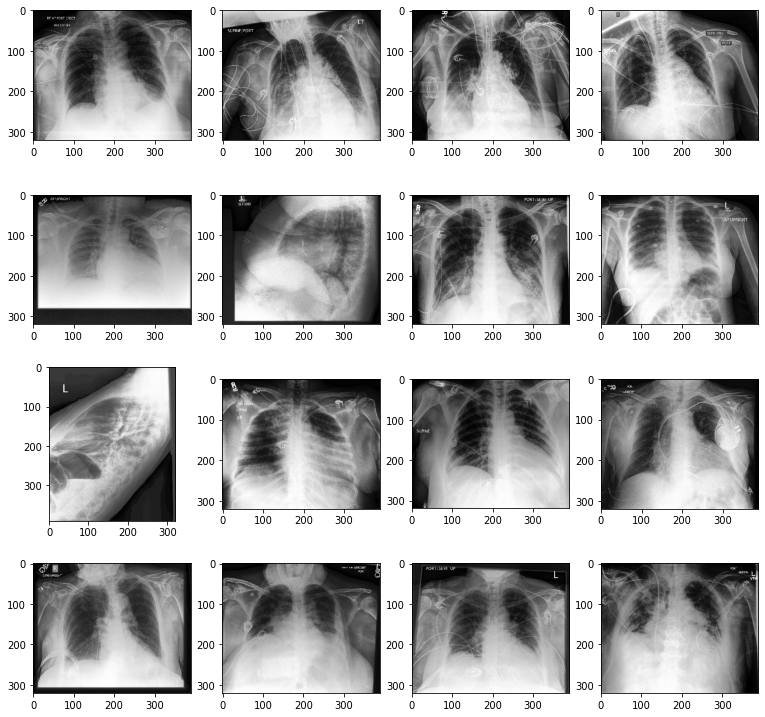

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
a=glob.glob("/content/drive/MyDrive/chexpert/dataset/train/edema/*.jpg")
plt.figure(figsize=(13,13))
for i in range(0,16):
    #print(a[i])
    g=cv2.imread(a[i])
    g=cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
    plt.subplot(4,4,i+1)
    #print(g.shape)
    plt.imshow(g)


# **Mimito**

In [ ]:
timm.list_models("*", pretrained = False)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano_hnf',
 'convnext_nano_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext

In [ ]:
model = timm.create_model("vit_base_patch8_224",pretrained = True)
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(8, 8), stride=(8, 8))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate=none)
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (ls2): Iden

In [ ]:
model.get_classifier()

Linear(in_features=768, out_features=1000, bias=True)

In [ ]:
block = nn.Sequential(
    nn.Linear(768, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 5)
)

In [ ]:
name, modulo = list(model.named_children())[-1]
name, modulo

('head', Linear(in_features=768, out_features=1000, bias=True))

In [ ]:
name, modulo = list(model.named_children())[-1]
model._modules[model.default_cfg['classifier']] = block
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(8, 8), stride=(8, 8))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate=none)
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (ls2): Iden

In [ ]:
model.default_cfg['classifier']

'head'

# **clases para dataset**

In [ ]:
class my_dataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        if self.transform:
            x = self.transform(self.dataset[index][0])
        else:
            x = self.dataset[index][0]      


        #plt.imshow(x)    
        y = self.dataset[index][1]
        return x, y
    
    def __len__(self):
        return len(self.dataset)

In [ ]:
'''
import os
base_dir = "/content/drive/MyDrive/retino/data"
path_test =  os.path.join(base_dir, 'test')
MD=my_dataset(datasets.ImageFolder(root = path_test))
print(MD.__len__())
for i in range(MD.__len__()):
  x, y = MD.__getitem__(i)
  plt.imshow(x)
  
  #print(y)
  if (y!=0):
      print(y)
      plt.imshow(x)
      break
  #if (i>50):
  #  break
'''

'\nimport os\nbase_dir = "/content/drive/MyDrive/retino/data"\npath_test =  os.path.join(base_dir, \'test\')\nMD=my_dataset(datasets.ImageFolder(root = path_test))\nprint(MD.__len__())\nfor i in range(MD.__len__()):\n  x, y = MD.__getitem__(i)\n  plt.imshow(x)\n  \n  #print(y)\n  if (y!=0):\n      print(y)\n      plt.imshow(x)\n      break\n  #if (i>50):\n  #  break\n'

In [ ]:
class DataModule2(pl.LightningDataModule):
    def __init__(self, dat_norm, data_dir: str, img_size = 224, batch_size = 200):
        super().__init__()
        self.data_dir = data_dir
        self.img_size = img_size
        self.test_transform = transforms.Compose([
            transforms.Resize(size = self.img_size),
            transforms.CenterCrop(size = self.img_size),
            transforms.ToTensor(), # 0-1
            transforms.Normalize(dat_norm[0], dat_norm[1])
        ])

        self.train_transform = transforms.Compose([
            transforms.Resize(size = self.img_size),
            #transforms.RandomRotation(degrees=15),
            transforms.CenterCrop(size=self.img_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(dat_norm[0], dat_norm[1])
            #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        self.batch_size = batch_size
        self.num_workers = 4
    
    def setup(self, stage = None):
        # train path
        path_train = os.path.join(self.data_dir, 'train')
        # test path
        path_valid =  os.path.join(self.data_dir, 'validation')
        path_test =  os.path.join(self.data_dir, 'test')
        #path_valid =  os.path.join(self.data_dir, 'valid')
        mydataset_train = datasets.ImageFolder(root = path_train)
        mydataset_test  = datasets.ImageFolder(root = path_test)
        mydataset_valid  = datasets.ImageFolder(root = path_valid)
        #mydataset_valid  = datasets.ImageFolder(root = path_valid)
        self.path_test = path_test
        self.categories =  mydataset_test.class_to_idx
        
        self.traindataset = my_dataset(mydataset_train, self.train_transform) # train
        self.validdataset = my_dataset(mydataset_valid, self.train_transform) # validation
        self.testdataset = my_dataset(mydataset_test, self.test_transform) # test

    def train_dataloader(self):
        train_loader = torch.utils.data.DataLoader(
            self.traindataset, 
            batch_size=self.batch_size, 
            num_workers=self.num_workers, 
            drop_last=True)
        return train_loader
    def val_dataloader(self):
        valid_loader = torch.utils.data.DataLoader(
            self.validdataset, 
            batch_size=self.batch_size, 
            num_workers=self.num_workers, 
            drop_last=True)
        return valid_loader
    def test_dataloader(self):
        test_loader = torch.utils.data.DataLoader(
            self.testdataset, 
            batch_size=self.batch_size,
            num_workers=self.num_workers, 
            drop_last=True)
        return test_loader

In [ ]:
class DataModule(pl.LightningDataModule):
    def __init__(self, dat_norm, data_dir: str, img_size = 224, batch_size = 200):
        super().__init__()
        self.data_dir = data_dir
        self.img_size = img_size
        self.test_transform = transforms.Compose([
            transforms.Resize(size = self.img_size),
            transforms.CenterCrop(size = self.img_size),
            transforms.ToTensor(), # 0-1
            transforms.Normalize(dat_norm[0], dat_norm[1])
        ])

        self.train_transform = transforms.Compose([
            transforms.Resize(size = self.img_size),
            #transforms.RandomRotation(degrees=15),
            transforms.CenterCrop(size=self.img_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(dat_norm[0], dat_norm[1])
            #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        self.batch_size = batch_size
        self.num_workers = 4
    
    def setup(self, stage = None):
        # train path
        path_train = os.path.join(self.data_dir, 'train')
        # test path
        path_test =  os.path.join(self.data_dir, 'test')
        #path_valid =  os.path.join(self.data_dir, 'valid')
        mydataset_train = datasets.ImageFolder(root = path_train)
        mydataset_test  = datasets.ImageFolder(root = path_test)
        #mydataset_valid  = datasets.ImageFolder(root = path_valid)
        self.path_test = path_test
        self.categories =  mydataset_train.class_to_idx
        traindataset = my_dataset(mydataset_train, self.train_transform) # train
        validdataset = my_dataset(mydataset_train, self.train_transform) # validation

        self.testdataset = my_dataset(mydataset_test, self.test_transform) # test

        # Create the index splits for training and validation  
        # Train is divided into two subsets: train and validation
        train_size = 0.9
        num_train = len(mydataset_train)
        indices = list(range(num_train))
        split = int(np.floor(train_size * num_train))
        np.random.shuffle(indices)
        train_idx, valid_idx = indices[:split], indices[split:]
        self.traindata = torch.utils.data.Subset(traindataset, indices=train_idx)
        self.validdata = torch.utils.data.Subset(validdataset, indices=valid_idx)


    def train_dataloader(self):
        train_loader = torch.utils.data.DataLoader(
            self.traindata, 
            batch_size=self.batch_size, 
            num_workers=self.num_workers, 
            drop_last=True)
        return train_loader
    def val_dataloader(self):
        valid_loader = torch.utils.data.DataLoader(
            self.validdata, 
            batch_size=self.batch_size, 
            num_workers=self.num_workers, 
            drop_last=True)
        return valid_loader
    def test_dataloader(self):
        test_loader = torch.utils.data.DataLoader(
            self.testdataset, 
            batch_size=self.batch_size,
            num_workers=self.num_workers, 
            drop_last=True)
        return test_loader

In [ ]:
class NetworkTransferLearning(pl.LightningModule):
    def __init__(self, type_net, optimizer="Adam", num_classes = 5, lr = 1e-3, pretrained = True):
        super().__init__()
        self.num_classes = num_classes
        self.optimizer = optimizer
        self.lr = lr
        self.backbone = timm.create_model(type_net, pretrained = pretrained)
        if pretrained:
            # freeze  weights
            for param in self.backbone.parameters():
                param.requires_grad = False

        self.num_in_feat = self.backbone.get_classifier().in_features

        block = nn.Sequential(nn.Linear(self.num_in_feat, 1024), 
                              nn.Dropout(0.5), 
                              nn.Linear(1024, 512), 
                              #nn.Dropout(0.5), 
                              nn.Linear(512, self.num_classes))

        name, module = list(self.backbone.named_children())[-1]
        self.backbone._modules[name] = block        

        # 3 Loss function
        self.loss = nn.CrossEntropyLoss()

        # 4 Metrics
        self.train_acc = Accuracy()
        self.valid_acc = Accuracy(compute_on_step=False)  
        self.test_acc  = Accuracy(compute_on_step=False)       

    def forward(self, x):
        out = self.backbone.forward(x)
        #out = self.backbone(x)
        return out

    def training_step(self, batch, batch_idx):
        images, targets = batch
        outputs = self(images)
        
        loss = self.loss(outputs, targets)

        #preds = nn.functional.softmax(outputs, dim=1)
        preds = torch.argmax(outputs, dim=1)
        self.train_acc(preds, targets)

        self.log('train_loss', loss)
        self.log('train_acc', self.train_acc)
        return loss

    def training_epoch_end(self, outs):
        loss =self.train_acc.compute()        
        self.log('avg_train_acc',loss)
        print(f"avg_train_acc: {loss}, ", end=" ")
    
    def validation_step(self, batch, batch_idx):
        images, targets = batch
        outputs = self(images)
        loss = self.loss(outputs, targets)

        #preds = nn.functional.softmax(outputs, dim=1)
        preds = torch.argmax(outputs, dim=1)
        self.valid_acc(preds, targets)
        self.log('val_loss', loss)
        self.log('val_acc', self.valid_acc)
        return loss
    
    def validation_epoch_end(self, val_step_outputs):
        avg_val_acc = self.valid_acc.compute()
        self.log('avg_val_acc',avg_val_acc)
        print(f"avg_val_acc: {avg_val_acc}")

    def test_step(self, batch, batch_idx):
        images, targets = batch
        outputs = self(images)
        loss = self.loss(outputs, targets)

        #preds = nn.functional.softmax(outputs, dim=1)
        preds = torch.argmax(outputs, dim=1)
        #print(preds)
        self.test_acc(preds, targets)
        self.log('test_loss', loss)
        self.log('test_acc', self.test_acc)
        return loss
    
    def test_epoch_end(self, val_step_outputs):
        self.log('avg_test_acc', self.test_acc.compute())

    def configure_optimizers(self):
      if self.optimizer == "Adam":
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
      else:
        #torch.optim.Adam(self.parameters(), lr=self.lr)
        optimizer = torch.optim.SGD(self.parameters(), lr=self.lr)
      return optimizer

    def get_mean_std(self):
      return self.backbone.default_cfg["mean"], self.backbone.default_cfg["std"]

# Entrenar

In [ ]:
from torch import optim
from pytorch_lightning import callbacks as pl_callbacks
from sklearn import metrics as sk_metrics
def train_process(modelo, num_epchs, porc = 0):
  callback_model_checkpoint = pl_callbacks.ModelCheckpoint(
      dirpath="/content/drive/MyDrive/chexpert/",
       filename='{epoch}-{valid_loss:.3f}', 
      monitor='val_loss', 
      mode='min'
  )

  chk_dir = "/content/drive/MyDrive/chexpert/" #donde guardar el modelo pré-entrenado
  img_size = 224
  base_dir = "/content/drive/MyDrive/chexpert/dataset/"#/content/drive/MyDrive/UNIVERSIDAD CATÓLICA PROYECTOS/EMOTION RECOGNITION/Datasets/Affect_net_local_gray"
  batch_size=32
  #model = "mobilenetv3_large_100"
  

  
  dm = DataModule(modelo.get_mean_std(),data_dir = base_dir, img_size = img_size, batch_size=batch_size)
  trainer = Trainer(fast_dev_run=False, default_root_dir=chk_dir, gpus=1, max_epochs=num_epchs, callbacks=callback_model_checkpoint)
  n = len(list(modelo.parameters()))
  for i, param in enumerate(modelo.parameters()):
    if i>n*(1-porc):
      print("entre a esta linea")
      param.requires_grad = True
  trainer.fit(modelo, dm)
  trainer.test(modelo, datamodule=dm)
  return model


In [ ]:
import gc

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
type_net = 'vit_base_patch8_224'
num_class = 2
lr = 1e-3
num_epchs = 5
optimizer = "Adam"
model = NetworkTransferLearning(type_net = type_net, optimizer = optimizer, num_classes=num_class, lr=lr)
model = train_process(model, num_epchs)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /content/drive/MyDrive/chexpert exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params
------------------------------------------------
0 | backbone  | VisionTransformer | 87.1 M
1 | loss      | CrossEntropyLoss  | 0     
2 | train_acc | Accuracy          | 0     
3 | valid_acc | Accuracy          | 0     
4 | test_acc  | Accur

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


avg_val_acc: 0.703125


Training: 0it [00:00, ?it/s]

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir "/content/drive/MyDrive/chexpert/lightning_logs"

In [ ]:
#@title func
@torch.no_grad()
def get_all_preds(model, loader):
    #device = "cpu"
    device="cuda:0"
    all_preds = torch.tensor([]).to(device)
    all_labels = torch.tensor([]).to(device)
    for i, (x, y) in enumerate(loader):
        print(f"Cargando batch {i+1}")
        x, y = x.to(device), y.to(device)
        preds = model(x)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
        all_labels = torch.cat(
            (all_labels, y)
            ,dim=0
        )
    return all_preds, all_labels

In [ ]:
model_t = 'beit_large_patch16_224'#'resnet101d'
modelo2 = NetworkTransferLearning.load_from_checkpoint("/content/drive/MyDrive/chexpert/epoch=4-valid_loss=0.000.ckpt", type_net=model_t, num_classes = 5)

In [ ]:
img_size = 224
dm = DataModule(modelo2.get_mean_std(), data_dir = "/content/drive/MyDrive/chexpert/dataset", img_size = img_size, batch_size=1)
dm.setup()

In [ ]:
y_true, y_pred = [],[]
from sklearn.metrics import confusion_matrix
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
modelo2 = modelo2.to(device)
loader = dm.test_dataloader()

with torch.no_grad():
    test_preds, all_labels = get_all_preds(modelo2, loader)

y_true = all_labels.cpu()
y_pred =test_preds.argmax(dim=1).cpu()
cm = confusion_matrix(y_true, y_pred)
tot = np.sum(cm, axis=1)
cm_porc = np.divide(cm, np.reshape(tot, (-1,1)))

In [ ]:
#@title Matriz de confusión con cantidades
labels = list(dm.categories)
# Calculate confusion matrix
#confusion_matrix = sk_metrics.confusion_matrix(y_true, y_pred)
df_confusion_matrix = pd.DataFrame(cm, index=labels, columns=labels)

# Show confusion matrix
plt.figure(figsize=(5, 5))
sn.heatmap(df_confusion_matrix, annot=True, cbar=False, cmap='Oranges', linewidths=1, linecolor='black', fmt='g')
plt.xlabel('Predicted labels', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('True labels', fontsize=15)
plt.yticks(fontsize=12);
#plt.savefig(os.path.join(RESULTS_PATH, "confusion_matrix.png"))


In [ ]:
#@title Matriz de confusión en porcentajes
labels = list(dm.categories)
# Calculate confusion matrix
#confusion_matrix = sk_metrics.confusion_matrix(y_true, y_pred)
df_confusion_matrix = pd.DataFrame(cm_porc, index=labels, columns=labels)

# Show confusion matrix
plt.figure(figsize=(12, 12))
sn.heatmap(df_confusion_matrix, annot=True, cbar=False, cmap='Oranges', linewidths=1, linecolor='black', fmt=".2%")
plt.xlabel('Predicted labels', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('True labels', fontsize=15)
plt.yticks(fontsize=12);
#plt.savefig(os.path.join(RESULTS_PATH, "confusion_matrix_porc.png"))

In [ ]:
report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
print(classification_report(y_true, y_pred, target_names=labels))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ecb3c18e-0416-41b9-a677-a4f66e89b3f3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Inferencia

In [ ]:
!nvidia-smi -L  


In [ ]:
from PIL import Image
torch.cuda.empty_cache()
dat_norm=modelo2.get_mean_std()
transform = transforms.Compose([
      transforms.Resize(size = 224),transforms.CenterCrop(size=224),transforms.ToTensor(),  transforms.Normalize(dat_norm[0], dat_norm[1])
])

filename=glob.glob('/content/drive/MyDrive/retino/test_subor/*')


batches=len(filename)//120
vector_indices=list(range(0,len(filename),batches))
print(vector_indices)
y_pred_t=[]
for j in range(0,len(vector_indices)):
  image = Image.open(filename[vector_indices[j]])
  img_tensor = transform(image)
  img_tensor=torch.unsqueeze(img_tensor,0)
  for i in range(vector_indices[j],vector_indices[j+1]-1):

    # transform = transforms.PILToTensor()
    # Convert the PIL image to Torch tensor
    image2 = Image.open(filename[i+1])
    img_tensor2 = transform(image2)
    img_tensor2=torch.unsqueeze(img_tensor2,0)

    img_tensor=torch.cat((img_tensor,img_tensor2),dim=0)


  img_tensor=img_tensor.to(device)
  preds = modelo2(img_tensor)
  y_pred =preds.argmax(dim=1).cpu()
  y_pred_t.append(y_pred)
  print(y_pred)


In [ ]:
vector_indices=[10527,10538]
for j in range(0,len(vector_indices)):
  image = Image.open(filename[vector_indices[j]])
  img_tensor = transform(image)
  img_tensor=torch.unsqueeze(img_tensor,0)
  for i in range(vector_indices[j],vector_indices[j+1]-1):

    # transform = transforms.PILToTensor()
    # Convert the PIL image to Torch tensor
    image2 = Image.open(filename[i+1])
    img_tensor2 = transform(image2)
    img_tensor2=torch.unsqueeze(img_tensor2,0)

    img_tensor=torch.cat((img_tensor,img_tensor2),dim=0)


  img_tensor=img_tensor.to(device)
  preds = modelo2(img_tensor)
  y_pred =preds.argmax(dim=1).cpu()
  y_pred_t.append(y_pred)
  print(y_pred)


In [ ]:
print(len(y_pred_t[0]))

In [ ]:
vector_g=[]
for i in range(0,len(y_pred_t)):
  a=list(y_pred_t[i].numpy())
  vector_g=vector_g+a
print(len(vector_g))

print(vector_g)

In [ ]:
print(len(filename))

filesx=list(map(lambda x: x.split('/')[-1].split('.')[0],filename))
print(filesx)

In [ ]:
import pandas as pd
df = pd.DataFrame(filesx, columns = ['ID'])
df['level']=vector_g
df

In [ ]:
df.to_csv('/content/drive/MyDrive/retino/out_beit.csv',index=False)